<h3 style="color: red;">
        * Môn học: Chuyên đề nghiên cứu về Thị giác máy tính (CS2309)
</h3>
<h3 style="color: red;">
        * Giảng viên: TS. Lê Đình Duy
</h3>
<h3 style="color: red;">
        * Học viên: Lê Nguyễn Sơn Nguyên
</h3>
<h3 style="color: red;">
        * Mã số: CH1702039
</h3>
<h3 style="color: red;">
        * Bài làm giữa kỳ: Triển khai bài toán nhận diện gương mặt (Face recognition) sử dụng mô hình CNNs
</h3>

<h2 style="color:blue">
BƯỚC 1: Import các thư viện, đối tượng (sử dụng thư viện chính là Keras)
</h2>
<p>
    <b>
    Nếu có báo lỗi phần này có nghĩa là thư viện hoặc gói phần mềm chưa được cài đặt
    </b>
</p>
<p>
    Sử dụng lệnh pip install ...
</p>

In [1]:
from __future__ import absolute_import, division, print_function

import os

import cv2
import keras.backend as K
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
from keras.applications.vgg16 import VGG16
from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Sequential, Model
from mtcnn.mtcnn import MTCNN

Using TensorFlow backend.


<h2 style="color:blue">
BƯỚC 2: Tạo ra một đối tượng để import dữ liệu hình dùng cho việc training
</h2>
<p>
    
</p>

In [2]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1 / 255)
image_generator

<h2 style="color:blue">
    BƯỚC 3: Nhập dữ liệu hình ảnh từ thư mục, ví dụ:
    
    /FaceDB
        /user1/...
        /user2/...        
</h2>   

In [3]:
current_patch = os.getcwd()
current_patch
image_data = image_generator.flow_from_directory(str(current_patch + "/FaceDB"))
image_data

Found 37 images belonging to 16 classes.


In [4]:
print("Mot vai thong so ve hinh anh: ")
for image_batch, label_batch in image_data:
    print("Image batch shape: ", image_batch.shape)
    print("Label batch shape: ", label_batch.shape)
    break

Mot vai thong so ve hinh anh: 
Image batch shape:  (32, 256, 256, 3)
Label batch shape:  (32, 16)


<h2 style="color:blue">
    BƯỚC 4: Đếm số Label của dữ liệu
</h2>
<p>
    <b><i>
        Dùng để thiết lập số output đầu ra khi train cũng như khi predict
    </i></b>
</p>

In [5]:
nb_classes = image_data.num_classes
nb_classes

16

<h2 style="color:blue">
    BƯỚC 5: Tạo model kiểu Sequential
</h2>    

In [6]:
model = Sequential()
model

<p>
    <h3 style="color:blue">
        BƯỚC 6: Sau đó thêm vào các Convolutional Layer (tự định nghĩa bằng tay) 
        cho mạng Neural mới tạo ra.
    </h3>
    <h4>
        <ol type="1">
        <P>
            <li>
            <p>
                Input layer là (256, 256, 3)
                </p>
            </li>
            </P>
            <P>
            <li>
            <p>
                Hàm activate là 'relu'
                </p>
            </li>
            </P>
            <P>
            <li>
                ...
            </li>
            </P>
        </ol>
    </h4    
</p>
<p>
    <img src="https://viblo.asia/uploads/3072c314-b562-4b33-816e-327d3cfe201b.png" />
    <i style="display: block; text-align: center; color: red">Hình minh họa mô hình CNNs</i>
</p>
<p>
    <i>
        * Lưu ý là số layer càng nhiều thì việc tiêu tốn tài nguyên càng nhiều
    </i>
</p>
<p>
    Tham khảo thêm thông tin khai báo tại đây:
    <a href="https://keras.io/layers/convolutional/">
        https://keras.io/layers/convolutional/
    </a>
</p>

In [7]:
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(nb_classes, activation='softmax'))

<H2 style="color:blue">
    BƯỚC 7: Định nghĩa thêm về hàm optimize và hàm chi phí (loss)
</H2>
<p>
    Tham khảo thêm thông tin khai báo tại đây:
    <a href="https://keras.io/optimizers/">
        https://keras.io/optimizers/
    </a>
</p>

In [8]:
model.compile(
    optimizer=tf.train.AdamOptimizer(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])

<H3 style="color:green">
    In ra các thông tin liên quan đến mạng neural vừa khai báo.
</H3>

In [9]:
print("Ket qua thong so cua model")
model.summary()

Ket qua thong so cua model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 256, 256, 64)      1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 256, 256, 64)      256       
_________________________________________________________________
activation_1 (Activation)    (None, 256, 256, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 128)     204928    
_________________________________________________________________
batch_normalization_2 (Batch (None, 128, 128, 128

<H3>
    Khởi tạo môi trường chạy.
</H3>    

In [10]:
sess = K.get_session()
init = tf.global_variables_initializer()
init
sess.run(init)

<H3>    
    Lấy các label name để gắn nhãn cho dữ liệu sau khi predict gương mặt xong.
</H3>    

In [11]:
label_names = sorted(image_data.class_indices.items(), key=lambda pair: pair[1])
label_names = np.array([key.title() for key, value in label_names])
print(label_names)
print("N data: ", image_data.n)
print("batch size: ", image_data.batch_size)

['Duyetlv' 'Duynn' 'Hantq' 'Hoaisd' 'Minhha' 'Mynh' 'Nhanth' 'Quanvm'
 'Taihpt' 'Tantd' 'Thaodnt' 'Truongtx' 'Tulg' 'Thuyltn' 'Vulq' 'Vund']
N data:  37
batch size:  32


<H2>
    BƯỚC 8: Bắt đầu train dữ liệu hình ảnh có được với model vừa định nghĩa ở trên
</H2>    
<P>
<B> 
    Lưu ý: ta chỉnh các thông số về epochs nhỏ để có thể train trên máy PC cá nhân, do CNN tiêu tốn rất nhiều tài nguyên khi train nên sẽ làm treo máy nếu config những thông số này lớn. Các chỉ số trong quá trình training: minimize hàm loss và tăng độ chính xác accuracy được thể hiện cụ thể bên dưới.
</B>    
</P>
<P>    
<i>
    P/S: Do nguồn dữ liệu cũng ít và hạn chế nên dù có tăng các chỉ số epochs lên thì cũng không làm cải thiện kết quả đáng kể.
</i>    
</P>    
    

In [12]:
model.fit_generator(generator=image_data,
                    steps_per_epoch=3,
                    epochs=10
                    )

Epoch 1/10
3/3 [==============================] - 92s 31s/step - loss: 2.9211 - acc: 0.2092
Epoch 2/10
3/3 [==============================] - 147s 49s/step - loss: 1.8708 - acc: 0.4546
Epoch 3/10
3/3 [==============================] - 90s 30s/step - loss: 1.8710 - acc: 0.4303
Epoch 4/10
3/3 [==============================] - 147s 49s/step - loss: 1.3650 - acc: 0.5954
Epoch 5/10
3/3 [==============================] - 90s 30s/step - loss: 1.6704 - acc: 0.4844
Epoch 6/10
3/3 [==============================] - 146s 49s/step - loss: 1.0337 - acc: 0.7670
Epoch 7/10
3/3 [==============================] - 90s 30s/step - loss: 1.1234 - acc: 0.7074
Epoch 8/10
3/3 [==============================] - 147s 49s/step - loss: 0.9096 - acc: 0.8241
Epoch 9/10
3/3 [==============================] - 91s 30s/step - loss: 0.9876 - acc: 0.7074
Epoch 10/10
3/3 [==============================] - 147s 49s/step - loss: 0.7775 - acc: 0.8663


<H2 style="color:blue">
    BƯỚC 9: Sau khi đã train model thì dùng model đó để predict những gương mặt được phát hiện
</H2>    
<P>
    Việc sử dụng thư viện MTCNN có thể tham khảo tại đây:
</P>
<p>
    <a href="https://github.com/ipazc/mtcnn">
    https://github.com/ipazc/mtcnn
    </a>
</p>

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] ['Duyetlv']
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] ['Duyetlv']
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] ['Duyetlv']
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] ['Duyetlv']
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] ['Duyetlv']
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] ['Duyetlv']
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] ['Duyetlv']
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] ['Duyetlv']
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] ['Duyetlv']
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] ['Duyetlv']
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] ['Duyetlv']
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] ['Duyetlv']
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] ['Duyetlv']
[[1. 0. 0. 0. 0. 0. 0.

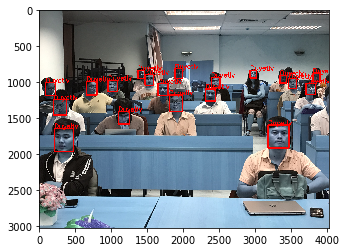

In [13]:
detector = MTCNN()

image_test = cv2.imread("test.png")
image_test
image_test_for_paint = cv2.imread("test.png")

result_dec = detector.detect_faces(image_test)
result_dec

for result in result_dec:
    bounding_box = result['box']
    img_crop = image_test[bounding_box[1]:bounding_box[1] + bounding_box[3],
               bounding_box[0]:bounding_box[0] + bounding_box[2]]
    
    img_crop = cv2.resize(img_crop, (256, 256))
    
    # sử dụng model để predict gương mặt
    predict_face = model.predict(img_crop[np.newaxis, ...])
    predict_face
    
    label_predict = label_names[np.argmax(predict_face, axis=-1)]
    print(predict_face, label_predict)

    cv2.rectangle(image_test_for_paint, (bounding_box[0], bounding_box[1]),
                  (bounding_box[0] + bounding_box[2], bounding_box[1] + bounding_box[3]),
                  (255, 0, 0),
                  17)
    cv2.putText(image_test_for_paint,
                label_predict[0],
                (bounding_box[0], bounding_box[1]),
                cv2.FONT_HERSHEY_SIMPLEX,
                3,
                (255, 0, 0),
                10
                )

plt.imshow(image_test_for_paint)
cv2.imwrite("test_draw_conv.jpg", image_test_for_paint)
plt.show()

<h2>
    <p style="color:red">
        NHẬN XÉT KẾT QUẢ (* đếm kết quả thủ công)
    </p>
    <OL TYPE="1">
        <P>
        <LI>
            <P>
                Ta thấy kết quả nhận diện thấp, chỉ khoảng 1 đến 2 gương mặt trong số tổng các gương mặt hiện có trong hình test.
            </P>
        </LI>
        </P>
        <P>
        <LI>
            <P>
                Do dữ liệu dùng để train ít (đây cũng là điểm hạn chế của mô hình CNN), mỗi người chỉ có từ 2-3 ảnh gương mặt.
            </P>
        </LI>
        </P>
        <P>
        <LI>
            <P>
                Chất lượng ảnh kém và không đồng đều, có to có nhỏ, các góc mặt không trực diện.
            </P>
        </LI>
        </P>
        <P>
        <li>
            ...
        </li>
        </P>
    </OL>        
    <p>
        ĐỀ XUẤT
    </p>
    <OL TYPE="1">
        <P>
        <LI> <i>           
                TĂNG CƯỜNG BỘ DỮ LIỆU.   </i>         
        </LI> 
        </P>  
        <P>     
        <LI>            
                <i>TĂNG CƯỜNG CHẤT LƯỢNG ẢNH VÀ GÓC CHỤP ẢNH TRỰC DIỆN.    </i>        
        </LI>
        </P>
        <P>
        <LI>            
                <I>TĂNG CƯỜNG PHẦN CỨNG HỆ THỐNG.</I>           
        </LI>
         </P>
         <p>
        <li>
            ...
        </li>
        </p>
    </OL>
<h2>   

<H3 style="color:green">
    Hoặc ta có thể dùng các Model có sẵn của Keras (cụ thể là model VGG16), config lại
    và train trên bộ dữ liệu của ta.
</H3>
<p>
    <img src="https://neurohive.io/wp-content/uploads/2018/11/vgg16-1-e1542731207177.png" />
    <i style="display: block; text-align: center; color: red">Hình minh họa mô hình VGG16</i>
</p>
<p>
    Tham khảo thêm tại: <a href="https://keras.io/applications/#vgg16">https://keras.io/applications/#vgg16</a>
</p  

In [14]:
model_vgg16_conv = VGG16(weights='imagenet', include_top=False)
model_vgg16_conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

<H3 style="color:green">
    Tự định nghĩa lớp Input đầu vào
</H3>    

In [15]:
input_layer = Input(shape=(256, 256, 3), name='image_input')
input_layer

<tf.Tensor 'image_input:0' shape=(?, 256, 256, 3) dtype=float32>

<H3 style="color:green">
    Gắn layer Input vào Model VGG16 đã tạo ở trên
</H3>

In [16]:
output_vgg16_conv = model_vgg16_conv(input_layer)
output_vgg16_conv

<tf.Tensor 'vgg16/block5_pool/MaxPool:0' shape=(?, 8, 8, 512) dtype=float32>

<H3 style="color:green">
    Tạo output layer
</H3>    

In [17]:
out_layer = Flatten(name='flatten')(output_vgg16_conv)
out_layer = Dense(4096, activation='relu', name='fc1')(out_layer)
out_layer = Dense(4096, activation='relu', name='fc2')(out_layer)
out_layer = Dense(nb_classes, activation='softmax', name='predictions')(out_layer)
out_layer

<tf.Tensor 'predictions/Softmax:0' shape=(?, 16) dtype=float32>

<H3 style="color:green">
    Hoàn thiện model
</H3>    

In [18]:
my_custom_model = Model(input=input_layer, output=out_layer)
my_custom_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_input (InputLayer)     (None, 256, 256, 3)       0         
_________________________________________________________________
vgg16 (Model)                multiple                  14714688  
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
fc1 (Dense)                  (None, 4096)              134221824 
_________________________________________________________________
fc2 (Dense)                  (None, 4096)              16781312  
_________________________________________________________________
predictions (Dense)          (None, 16)                65552     
Total params: 165,783,376
Trainable params: 165,783,376
Non-trainable params: 0
______________________________________________________________

C:\Users\baole\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("im..., outputs=Tensor("pr...)`
  """Entry point for launching an IPython kernel.


<H3 style="color:green">
    THIẾT LẬP COMPILE VÀ 
    Bắt đầu train dữ liệu trên model mới.
</H3>

In [ ]:
my_custom_model.compile(
    optimizer=tf.train.AdamOptimizer(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])

my_custom_model.fit_generator(
    generator=image_data,
    steps_per_epoch=1,
    epochs=5
)

Epoch 1/5


<H3>
    <p style="color:red">LƯU Ý:</p>
    <P>
        <I>
            * Do cấu hình phần cứng của máy không không cho phép nên quá trình train không thể chạy được.
        </I>
    </P>
    <P>
        <I>
            * Nếu sau khi đã training xong model thì có thể xử dụng để predict face như bình thường (phần trình bày ở trên).
        </I>
    </P>
</H3>
